In [119]:
import numpy as np
from config import app, db, experiment
from models import *
participants = [p for p in Participant.select().dicts()] # get all participants
trials = [p for p in Trial.select().dicts()] # get all trials

In [23]:
Trial.select().where(Trial.index==1)[:]

[<Trial 1> participant=1, truth=é, assist=1.0, answer1=é, answer2=è, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=2, truth=é, assist=1.0, answer1=i, answer2=è, listen_count=4, listens=? ? i ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=3, truth=é, assist=1.0, answer1=u, answer2=é, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=4, truth=é, assist=1.0, answer1=i, answer2=é, listen_count=4, listens=? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=5, truth=é, assist=1.0, answer1=é, answer2=e, listen_count=14, listens=? ? ? ? ? ? ? ? ? ? ? ? ? e ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=6, truth=é, assist=1.0, answer1=é, answer2=i, 

In [48]:
for p in participants:
    print(p)

{'id': 1, 'gender': 'female', 'age': 27, 'native': True, 'consent': True, 'name': 'Marie', 'date_created': datetime.datetime(2024, 2, 8, 10, 49, 36, 684878), 'completed': True, 'trial_permutation': [7, 5, 23, 18, 3, 14, 24, 30, 19, 15, 11, 27, 13, 9, 4, 17, 28, 16, 8, 6, 29, 22, 26, 21, 0, 1, 25, 2, 20, 10, 12]}
{'id': 2, 'gender': 'male', 'age': 25, 'native': True, 'consent': True, 'name': 'The Floof', 'date_created': datetime.datetime(2024, 2, 8, 15, 7, 9, 377495), 'completed': True, 'trial_permutation': [11, 16, 27, 2, 17, 5, 30, 18, 14, 21, 0, 6, 7, 9, 23, 29, 1, 24, 20, 13, 26, 8, 19, 4, 22, 3, 28, 15, 25, 12, 10]}
{'id': 3, 'gender': 'male', 'age': 31, 'native': True, 'consent': True, 'name': 'L.D.', 'date_created': datetime.datetime(2024, 2, 8, 15, 8, 59, 193783), 'completed': True, 'trial_permutation': [28, 14, 11, 15, 27, 10, 23, 26, 24, 16, 4, 21, 7, 8, 12, 2, 25, 19, 9, 17, 5, 1, 13, 20, 6, 22, 30, 3, 29, 0, 18]}
{'id': 4, 'gender': 'male', 'age': 31, 'native': True, 'consen

In [32]:
# participants names
print('\n'.join( f"{p['id']}: {p['name']}" for p in participants))

1: Marie
2: The Floof
3: L.D.
4: Arythtmique2ouf
5: martichou
6: Kinou
7: Epi
8: Clem
9: Florian
10: Bobus
11: 


In [53]:
# vowel reference: https://fr.wikipedia.org/wiki/Formant
# by vowels were analyzed manually with Praat

from collections import namedtuple
Vowel = namedtuple('Vowel', 'F1 F2 nasal F1_by F2_by')
a = Vowel(750, 1450, False, 700, 1250) # by formants are hard to read
i = Vowel(250, 2250, False, 280, 2040)
ou = Vowel(300, 750, False, 300, 750)
u = Vowel(250, 1750, False, 300, 1700)
é = Vowel(400, 2050, False, 330, 1950)
è = Vowel(600, 1750, False, 500, 1850)
e = Vowel(350, 1350, False, 330, 1380) # eu from 'feu'
o = Vowel(350, 750, False, 350, 650)
an = Vowel(750, 1250, True, 600, 880) # by formants are hard to read
on = Vowel(500, 1250, True, 350, 1380)
ain = Vowel(700, 1500, True, 730, 1260)

vowels = {'a': a, 'i': i, 'ou': ou, 'u': u, 'é': é, 'è': è, 'e': e, 'o': o, 'an': an, 'on': on, 'in': ain}

In [93]:
# Helpers

truth = [t['truth'] for t in trials]
pred = [t['answer1'] for t in trials]
pred2 = [t['answer2'] for t in trials]
assist = [t['assist'] for t in trials]


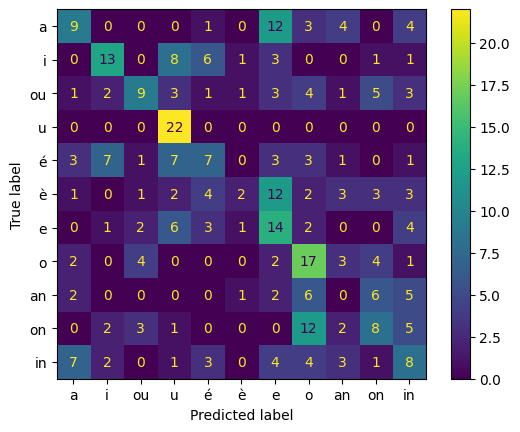

In [96]:
# Confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [v for v in vowels]
confusion = confusion_matrix(truth, pred, labels=labels)
disp = ConfusionMatrixDisplay.from_predictions(truth, pred, labels=labels)


Text(0, 0.5, 'Accuracy')

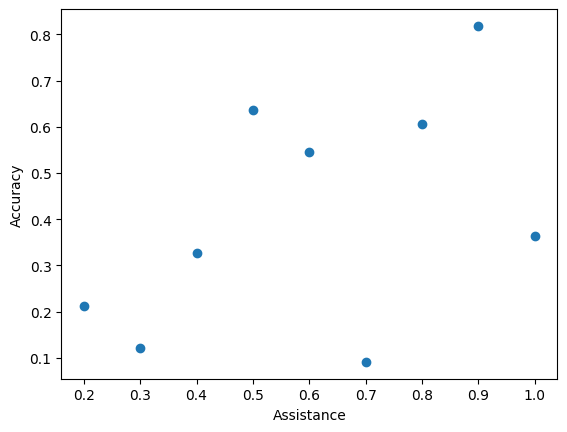

In [183]:
# Effect of assistance on the percentage of correct predictions

assist_values = sorted(list(set(assist)))
bins = []
for assistance in assist_values:
    trials_assist = [t for t in trials if t['assist'] == assistance]
    correct = sum([t['truth'] == t['answer1'] for t in trials_assist])
    bins.append( correct/len(trials_assist) )

ax = plt.axes()
ax.scatter(assist_values, bins)
ax.set_xlabel('Assistance')
ax.set_ylabel('Accuracy')
    

[[ 0. 22.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0. 22. 11.  0.  0.  0.  0.  0.]
 [11. 11.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0. 11.  0.  0.  0. 11.  0.  0.]
 [11.  0. 11.  0.  0.  0.  0.  0. 11.]
 [11. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0.  0.  0. 11.  0. 11.  0.  0.]
 [22.  0.  0.  0.  0.  0.  0. 11.  0.]
 [ 0. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0. 11. 11.  0.  0.  0.  0.  0.]
 [22. 11.  0.  0.  0.  0.  0.  0.  0.]]


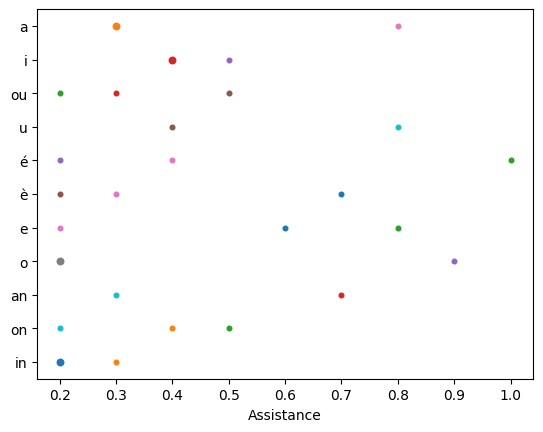

In [180]:
# number of vowels per assist value

assist_values = sorted(list(set(assist)))
ax = plt.axes()

m = np.zeros((len(assist_values), len(vowels)))

for i, assistance in enumerate(assist_values):
    for j, v in enumerate(vowels):
        m[i][j] = Trial.select().where( (Trial.assist==assistance) & (Trial.truth==v) ).count()
        ax.scatter(assistance, len(vowels)-j -1, s=m[i][j])

ax.set_xlabel('Assistance')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels[::-1])
print(m.transpose())


<Axes: xlabel='F2', ylabel='F1'>

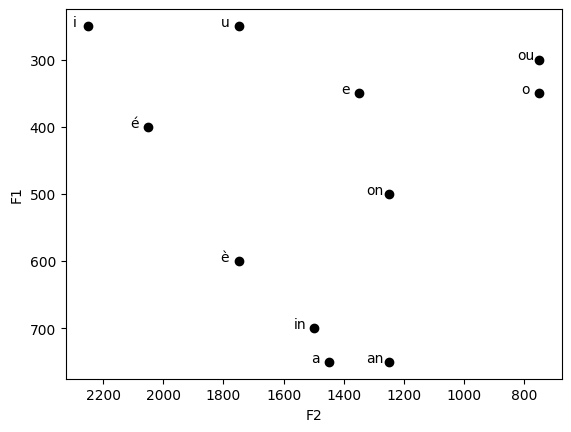

In [208]:
# Vocalic triangle

def plot_vocalic_triangle():
    """ Plot vocalic triangle with reference vowels

        return: axes
    """
    ax = plt.axes()
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    # plot reference vowels
    for v in vowels:
        ax.scatter(vowels[v].F2, vowels[v].F1, label=v, c='black')
        ax.text(vowels[v].F2 + 45 , vowels[v].F1 + 0, v, ha="center")
    
    ax.set_xlabel('F2')
    ax.set_ylabel('F1')

    return ax

plot_vocalic_triangle()


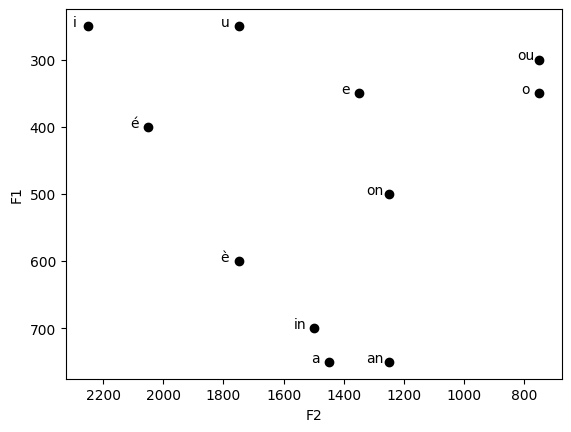

In [209]:
# plot cloud of answered vowels

ax = plot_vocalic_triangle()